In [1]:
import pytesseract
import numpy as np
from PIL import Image, ImageDraw, ImageFont

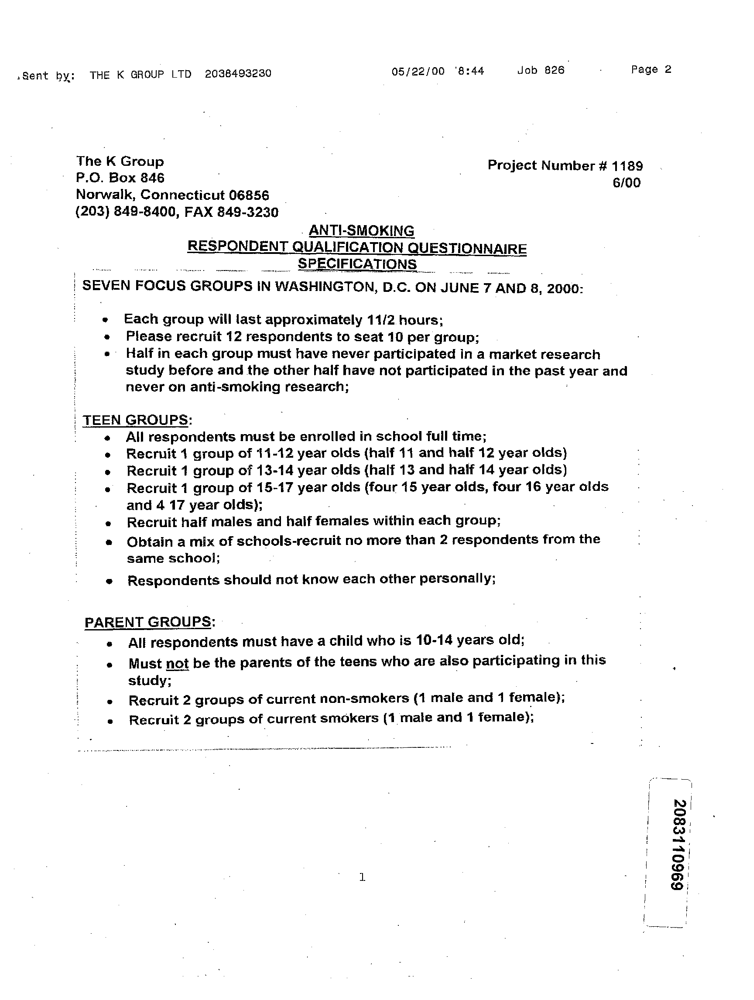

In [2]:
image = Image.open("../../train/train/1.tif")
image = image.convert("RGB")
image

In [3]:
# get words form the document
ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
ocr_df = ocr_df.dropna().reset_index(drop=True)
float_cols = ocr_df.select_dtypes('float').columns
ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
words = ' '.join([word for word in ocr_df.text if str(word) != 'nan'])

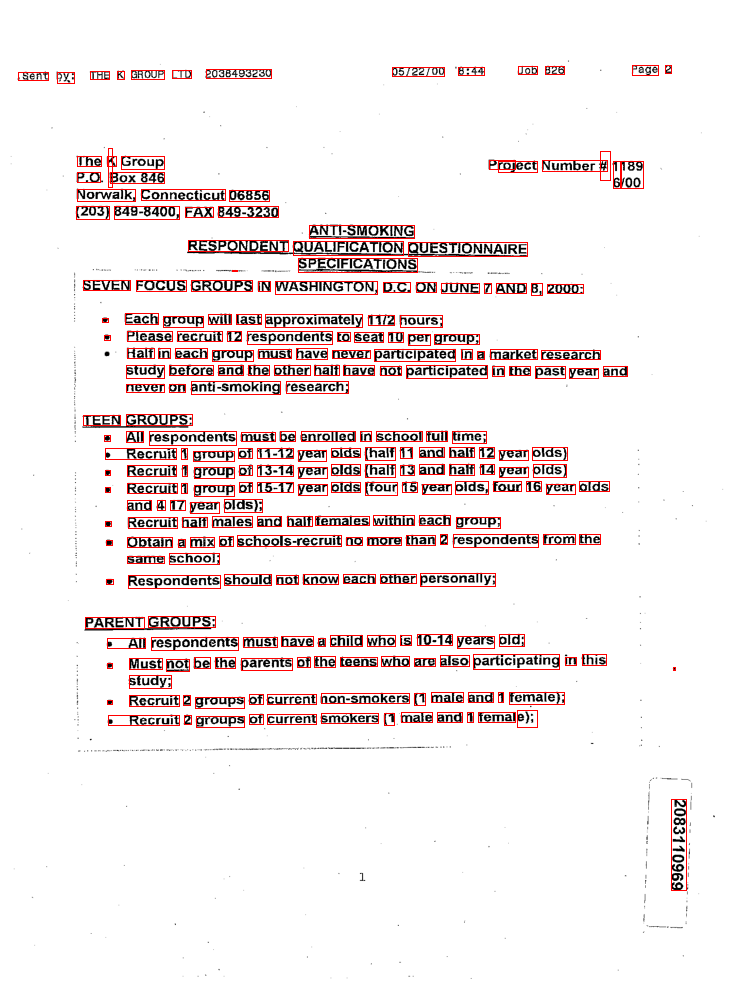

In [4]:
# put bounding boxes around the words
coord = ocr_df[['left', 'top', 'width', 'height']]
actual_boxes = []
for idx, row in coord.iterrows():
    x, y, w, h = tuple(row)
    actual_boxes.append([x, y, x + w, y + h])
    
draw = ImageDraw.Draw(image, 'RGB')
for box in actual_boxes:
    draw.rectangle(box, outline='red')
    
image

In [5]:
import os
import pandas as pd

In [6]:
categorized_dataset_path = '../../train/catagorized_images/'

In [7]:
labels = [int(label) for label in os.listdir(categorized_dataset_path)]
labels

[0, 1, 10, 11, 12, 13, 14, 15, 2, 3, 4, 5, 6, 7, 8, 9]

In [8]:
images = []
labels = []

for label_folder, _, file_name in os.walk(categorized_dataset_path):
    if label_folder != categorized_dataset_path:
        label = label_folder[31:]
        for _, _, image_names in os.walk(label_folder):
            relative_image_names = []
            for image in image_names:
                relative_image_names.append(categorized_dataset_path + label + '/' + image)
            images.extend(relative_image_names)
            labels.extend([label] * len(relative_image_names))

data = pd.DataFrame.from_dict({'image_path': images, 'label': labels})
data.head(16)
   

,image_path,label
0,../../train/catagorized_images/0/10033.tif,0
1,../../train/catagorized_images/0/10040.tif,0
2,../../train/catagorized_images/0/10075.tif,0
3,../../train/catagorized_images/0/10081.tif,0
4,../../train/catagorized_images/0/10106.tif,0
5,../../train/catagorized_images/0/1011.tif,0
6,../../train/catagorized_images/0/10121.tif,0
7,../../train/catagorized_images/0/10125.tif,0
8,../../train/catagorized_images/0/10126.tif,0
9,../../train/catagorized_images/0/10127.tif,0


In [9]:
from datasets import Dataset

d:\YEAR3 sem1\CSE3061 - Artificial Intelligence for Cyber Security\DA\KAGGLE_HACKATHON\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
def normalize_box(box, width, height):
    return [
         int(1000 * (box[0] / width)),
         int(1000 * (box[1] / height)),
         int(1000 * (box[2] / width)),
         int(1000 * (box[3] / height)),
     ]

In [11]:
def apply_ocr(example):
    # get image
    image_temp = Image.open(example['image_path'])
    image = image_temp.copy()
    image_temp.close()
    
    width, height = image.size
	
	# apply ocr to the image 
    ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
    float_cols = ocr_df.select_dtypes('float').columns
    ocr_df = ocr_df.dropna().reset_index(drop=True)
    ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
    ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
    ocr_df = ocr_df.dropna().reset_index(drop=True)    
    
    # get the words and actual (unnormalized) bounding boxes
    #words = [word for word in ocr_df.text if str(word) != 'nan'])
    words = list(ocr_df.text)
    words = [str(w) for w in words]
    coordinates = ocr_df[['left', 'top', 'width', 'height']]
    actual_boxes = []
    for idx, row in coordinates.iterrows():
        x, y, w, h = tuple(row)
        actual_box = [x, y, x + w, y + h]
        actual_boxes.append(actual_box)    

    # normalize the bounding boxes
    boxes = []
    for box in actual_boxes: boxes.append(normalize_box(box, width, height))

	# add as extra columns 
    assert len(words) == len(boxes)
    example['words'] = words
    example['bbox'] = boxes
    return example

In [12]:
# saving the dataframe
data.to_csv('../../src/labeled_dataset.csv')

In [13]:
data = pd.read_csv('../../src/labeled_dataset.csv')

In [14]:
data1 = data[:4000]
data2 = data[4000:6000]
data3 = data[6000:8000]
data4 = data[8000:10000]
data5 = data[10000:12000]
data6 = data[12000:14000]
data7 = data[14000:16000]

In [15]:
# dataset1 = Dataset.from_pandas(data1)
# updated_dataset1 = dataset1.map(apply_ocr)

# # saving the dataframe
# updated_dataset1.to_csv('../../src/ocr_dataset1.csv')

In [16]:
# dataset2 = Dataset.from_pandas(data2)
# updated_dataset2 = dataset2.map(apply_ocr)

# # saving the dataframe
# updated_dataset2.to_csv('../../src/ocr_dataset2.csv')

In [17]:
# dataset3 = Dataset.from_pandas(data3)
# updated_dataset3 = dataset3.map(apply_ocr)

# # saving the dataframe
# updated_dataset3.to_csv('../../src/ocr_dataset3.csv')

In [18]:
# dataset4 = Dataset.from_pandas(data4)
# updated_dataset4 = dataset4.map(apply_ocr)

# # saving the dataframe
# updated_dataset4.to_csv('../../src/ocr_dataset4.csv')

In [19]:
# dataset5 = Dataset.from_pandas(data5)
# updated_dataset5 = dataset5.map(apply_ocr)

# # saving the dataframe
# updated_dataset5.to_csv('../../src/ocr_dataset5.csv')

In [20]:
# dataset6 = Dataset.from_pandas(data6)
# updated_dataset6 = dataset6.map(apply_ocr)

# # saving the dataframe
# updated_dataset6.to_csv('../../src/ocr_dataset6.csv')

In [21]:
dataset7 = Dataset.from_pandas(data7)
updated_dataset7 = dataset7.map(apply_ocr)

# saving the dataframe
updated_dataset7.to_csv('../../src/ocr_dataset7.csv')

Creating CSV from Arrow format: 100%|██████████| 1/1 [00:13<00:00, 13.79s/ba]


13824125